## Author - Vishrut Shah

# Task 1: Prediction using Supervised ML

### Predict the percentage of an student based on the no. of study hours

In [7]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [8]:
# Reading the Data 
data = pd.read_csv('http://bit.ly/w-data')

print("Data Imported")

Data Imported


In [9]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [10]:
# Check if there any null value in the Dataset
data.isnull == True

False

## DATA VISUALIZATION

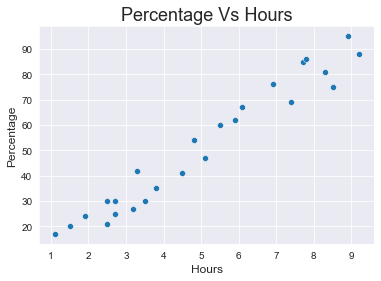

In [11]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Percentage Vs Hours', size=18)
plt.ylabel('Percentage', size=12)
plt.xlabel('Hours', size=12)
plt.show()

#### From the scatter plot there looks to be correlation between the 'Percentage' and 'Hours'

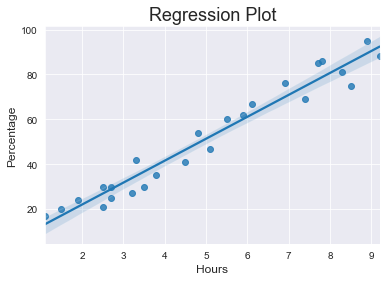

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [12]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=18)
plt.ylabel('Percentage', size=12)
plt.xlabel('Hours', size=12)
plt.show()
print(data.corr())

#### It is confirmed that the variables are positively correlated.

## PREPARING THE DATA

In [13]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

##### Spliting the data into training data set and testing data set

In [14]:
# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

## MODEL BUILDING

In [15]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("Model is trained")

Model is trained


## Predicting the Percentage of Marks

In [16]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


## Comparing the Predicted Marks with the Actual Marks

In [17]:
compare = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


## EVALUATION OF THE MODEL

In [18]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486


## PREDICTED SCORE IF A STUDENT STUDIES FOR 9.25 HOURS PER DAY 

In [19]:
hours = [9.25]
answer = regression.predict([hours])
print('No of hours ={}'. format(hours))
print("Score = {}".format(answer[0]))

No of hours =[9.25]
Score = 93.89272889341655


##### From the above it is clear that if a student studies for 9.25 hours a day, the predicted marks is 93.89